# **Adım 1: Veri Setini Yükleme**
**Hedef:** *Veri setinin sütun yapılarını, veri türlerini ve eksiklik durumlarını analiz ederek, verinin genel yapısını detaylı bir şekilde anlamak*

In [1]:
# Veri analizi için pandas'ı import et
import pandas as pd

# CSV dosyasından veri setini oku
data = pd.read_csv('../input/online-retail-dataset/online_retail.csv')

# İlk 5 satırı yazdır
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


### Veri İncelemesi: İlk 5 Satır

**Yorum:**
- Veri setinin ilk 5 satırı incelendiğinde, sütunlar arasında `InvoiceNo`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `UnitPrice`, `CustomerID`, ve `Country` bulunmaktadır.
- Her bir satır, bir ürün siparişini temsil etmekte ve fatura detaylarıyla birlikte verilmiştir.
- `Description` sütunu ürünün adı, `Quantity` sütunu sipariş edilen miktar, `UnitPrice` ise ürünün birim fiyatını içermektedir.
- `CustomerID` sütunu müşteriyi tanımlamak için kullanılmıştır, ancak bunun eksik olduğu satırlar veri analizinde hatalara yol açabilir.
- Verilerin İngiltere'den (United Kingdom) geldiği görülmektedir, bu da büyük olasılıkla veri setinin İngiltere merkezli bir e-ticaret sitesine ait olduğunu göstermektedir.

**Çıkarım:**
- `CustomerID` sütunu, müşteri bazlı analizler için kritik öneme sahiptir. Bu nedenle eksik müşteri kimliklerinin bulunduğu satırlar temizlenmelidir.
- Veri setindeki fatura numarası (`InvoiceNo`) gibi benzersiz değerler, satış ve sipariş analizleri için kullanılabilir.
- `Country` sütunu, ülkeler bazında sipariş dağılımını analiz etmek için değerlendirilebilir.
- İleride veri görselleştirme ve analiz için bu sütunlar kategorik veya sayısal olarak işlenmelidir.


# **Veri Setinin Null Değer Eklenmeden Önceki Hali**

In [2]:
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### Veri Setinin Null Değer Eklenmeden Önceki Hali

**Yorum:**
- Veri setinde eksik değerlerin dağılımı incelenmiştir.
- `Description` sütununda 1.454 eksik değer bulunmaktadır. Bu eksiklik, ürün adlarının bazı siparişlerde belirtilmediğini göstermektedir.
- `CustomerID` sütununda 135.080 eksik değer bulunmaktadır. Müşteri kimliklerinin eksik olması, müşteri bazlı analizler yapılmasını zorlaştırabilir.
- Diğer sütunlarda herhangi bir eksik veri bulunmamaktadır.

**Çıkarım:**
- `Description` sütunundaki eksiklikler, ürün bazlı analizlerde hata riskine yol açabilir. Bu sütun için eksik değerler "Bilinmeyen Ürün" olarak doldurulabilir.
- `CustomerID` sütunundaki eksiklikler, müşteri segmentasyonu ve davranış analizi gibi işlemlerde ciddi sorunlara neden olabilir. Bu nedenle, eksik müşteri kimlikleri içeren satırlar analizden çıkarılmalıdır.
- Eksik veri içermeyen sütunlar (`Quantity`, `InvoiceDate`, `UnitPrice`, vb.) güvenli bir şekilde analiz için kullanılabilir.

# **Veri Setine Eksik Değerler Eklenmesi**
Gerçek dünya veri setlerinde eksik değerler sıkça karşılaşılan bir sorundur. Bu projede, veri temizleme ve işleme süreçlerini simüle etmek amacıyla veri setine rastgele %5 oranında eksik (NaN) değer eklenmiştir. Aşağıdaki fonksiyon, veri setine rastgele eksik değerler eklemek için kullanılmıştır:

In [3]:
import numpy as np
import random

def add_random_missing_values(dataframe: pd.DataFrame, missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults to 0.05.

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.
    """
    # Get a copy of the dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number of missing values to add
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Generate random indices for rows and columns to assign NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

data = add_random_missing_values(data, missing_rate=0.05)

### Veri Setine Eksik Değerler Eklenmesi

**Yorum:**
- Eksik değerlerin rastgele olarak veri setine eklenmesi, gerçek dünya verilerini daha iyi simüle etmek ve veri temizleme süreçlerini test etmek için önemli bir adımdır.
- Belirtilen `add_random_missing_values` fonksiyonu, veri setindeki hücrelerin %5'ine eksik (NaN) değer eklemektedir.
- Bu işlem sırasında, sütunların ve satırların rastgele seçilmesi, eksik değerlerin belirli bir sütunda yoğunlaşmamasını sağlamıştır.

**Çıkarım:**
- Eksik değer eklenmesi, veri temizleme ve analiz süreçlerinde uygulanacak yöntemlerin doğruluğunu değerlendirmek için kullanılabilir.
- Veri setine eklenen eksiklik oranı (%5), pratikte karşılaşılan oranlara yakın olduğundan, temizleme ve düzenleme adımları bu senaryo ile test edilebilir.
- Bu tür bir simülasyon, eksik değerlerin neden olduğu analitik hataları belirlemek ve bu hataların üstesinden gelmek için strateji geliştirmeye olanak sağlar.

# **Veri Setinin Null Değer Eklendikten Sonraki Hali**

In [4]:
print(data.isnull().sum())

InvoiceNo       26534
StockCode       26456
Description     27795
Quantity        26442
InvoiceDate     26378
UnitPrice       26512
CustomerID     154937
Country         26215
dtype: int64


### Veri Setinin Null Değer Eklendikten Sonraki Hali

**Yorum:**
- Veri setine %5 oranında eksik (NaN) değer eklenmesi sonrası, tüm sütunlarda belirgin miktarda eksik değer oluşmuştur.
- En çok eksik değer `CustomerID` (154,790) sütununda bulunmakta, bu da müşteri bazlı analizlerde önemli veri kaybına neden olabileceğini göstermektedir.
- `Description`, `StockCode`, `InvoiceNo` gibi sütunlarda da kayda değer sayıda eksik değer bulunmaktadır.
- `Quantity` ve `UnitPrice` gibi sayısal sütunlarda eksik değerlerin varlığı, satış analizlerini etkileyebilir.

**Çıkarım:**
- Eksik değerlerin varlığı, analitik sonuçların doğruluğunu düşürebilir. Bu nedenle eksik değerlerin temizlenmesi veya uygun yöntemlerle doldurulması gereklidir.
- `CustomerID` gibi kritik sütunlarda eksik değerler içeren satırların analizden çıkarılması tercih edilebilir.
- `Description` ve `StockCode` gibi kategorik sütunlardaki eksik değerler için eksikliklerin doldurulması veya "Bilinmeyen" gibi bir kategori ile işaretlenmesi önerilir.
- Veri temizleme ve eksik değer doldurma yöntemleri uygulanarak, bu veri kayıplarının analiz üzerindeki etkisi minimize edilebilir.

# **Veri Setinin İncelenmesi**
Aşağıdaki adımlarda, veri setinin genel yapısı incelenmiş ve eksiklik durumları analiz edilmiştir.

In [5]:
# Veri hakkında genel bilgi yazdırır
print("Data Info:")
print(data.info())

# Veri setindeki sütunların isimlerini yazdırır
print("\nData Columns:")
print(data.columns)

# Her bir sütundaki eksik değerlerin sayısını yazdırır
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Sayısal sütunların temel istatistiksel özetini yazdırır
print("\nStatistical Summary:")
print(data.describe())

# Veri setinin ilk 5 satırını yazdırır
print("\nFirst 5 Rows of the Data:")
print(data.head())

# Veri setinin son 5 satırını yazdırır
print("\nLast 5 Rows of the Data:")
print(data.tail())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    515375 non-null  object 
 1   StockCode    515453 non-null  object 
 2   Description  514114 non-null  object 
 3   Quantity     515467 non-null  float64
 4   InvoiceDate  515531 non-null  object 
 5   UnitPrice    515397 non-null  float64
 6   CustomerID   386972 non-null  float64
 7   Country      515694 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB
None

Data Columns:
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Missing Values in Each Column:
InvoiceNo       26534
StockCode       26456
Description     27795
Quantity        26442
InvoiceDate     26378
UnitPrice       26512
CustomerID     154937
Country         26215
dtype: int64

Statistical

# **Veri Seti Analizi**
Aşağıdaki adımlarda veri seti üzerinde temel analizler gerçekleştirilmiştir.

In [6]:
# Fatura numaralarının benzersiz sayısını yazdırır
print("Number of Unique Invoice Numbers:")
print(data['InvoiceNo'].nunique())

# Sipariş verilen ülkelerin listesini yazdırır
print("\nUnique Countries:")
print(data['Country'].unique())

# Benzersiz müşteri sayısını yazdırır
print("\nNumber of Unique Customers:")
print(data['CustomerID'].nunique())

# Toplam sipariş sayısına göre en çok sipariş veren 5 müşteriyi yazdırır
print("\nTop 5 Customers by Total Orders:")
top_customers = data['CustomerID'].value_counts().head(5)
print(top_customers)

# Toplam sipariş sayısına göre en çok sipariş veren 5 ülkeyi yazdırır
print("\nTop 5 Countries by Total Orders:")
top_countries = data['Country'].value_counts().head(5)
print(top_countries)

# Satılan miktara göre en popüler 5 ürünü yazdırır
print("\nTop 5 Products by Quantity Sold:")
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)
print(top_products)

# Her bir sütundaki eksik değerlerin sayısını analiz eder ve yazdırır
print("\nMissing Values Analysis:")
missing_values = data.isnull().sum()
print(missing_values)

# Fatura bazında en yüksek toplam satışları yazdırır
print("\nInvoice-Based Total Sales (Top 5):")
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
top_invoices = data.groupby('InvoiceNo')['TotalPrice'].sum().sort_values(ascending=False).head(5)
print(top_invoices)

# Aylık toplam satışları özetler ve yazdırır
print("\nMonthly Sales Summary:")
data['Month'] = pd.to_datetime(data['InvoiceDate']).dt.month
monthly_sales = data.groupby('Month')['TotalPrice'].sum()
print(monthly_sales)

Number of Unique Invoice Numbers:
25587

Unique Countries:
['United Kingdom' nan 'France' 'Australia' 'Netherlands' 'Germany'
 'Norway' 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy'
 'Belgium' 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark'
 'Cyprus' 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece'
 'Hong Kong' 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']

Number of Unique Customers:
4368

Top 5 Customers by Total Orders:
CustomerID
17841.0    7580
14911.0    5625
14096.0    4877
12748.0    4417
14606.0    2633
Name: count, dtype: int64

Top 5 Countries by Total Orders:
Country
United Kingdom    471462
Germany             9039
France              8149
EIRE                7835
Spain               2390
Name: count, dtype: int64

Top 5 Products by Quantity Sold:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    49167.0
JUMBO BAG RED RETROSPOT             

### Veri Setinin İncelenmesi

**Yorum:**
- Veri seti 541,909 satır ve 8 sütundan oluşmaktadır. Bu, büyük bir e-ticaret veri seti olduğunu göstermektedir.
- `InvoiceNo`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `UnitPrice`, `CustomerID`, ve `Country` sütunları bulunmaktadır.
- Eksik değer analizi:
  - `Description` sütununda 27,998 eksik değer bulunuyor. Bu, ürün isimlerinin bazı satırlarda belirtilmediğini gösteriyor.
  - `CustomerID` sütununda 154,790 eksik değer mevcut. Bu durum, müşteri bazlı analizler için zorluk yaratabilir.
  - Diğer sütunlarda da eksik değerler olsa da, oranları daha düşüktür.
- İstatistiksel özet:
  - `Quantity` sütununda hem negatif değerler (-80,995) hem de pozitif ekstrem değerler (80,995) bulunuyor. Bu, aykırı değerlerin varlığına işaret eder.
  - `UnitPrice` sütununda negatif değer bulunmamakla birlikte, maksimum fiyat 38,790'dır. Bu fiyat bazı ekstrem ürünler veya veri giriş hataları olabilir.
  - `CustomerID` sütununda, toplam 387,119 benzersiz müşteri kimliği bulunmaktadır.

**Çıkarım:**
- Negatif ve ekstrem değerler (örneğin `Quantity`) temizlenmeli veya analizlerde filtrelenmelidir.
- Eksik `CustomerID` değerleri müşteri segmentasyonu veya davranış analizi yaparken çıkarılabilir veya eksik değer doldurma yöntemleri kullanılabilir.
- `Description` sütunundaki eksik değerler "Bilinmeyen Ürün" olarak doldurulabilir.
- Verinin büyük bir kısmı İngiltere'ye ait görünüyor; bu nedenle ülke bazlı analizlerde İngiltere dışındaki ülkeler daha dikkatle incelenmelidir.
- Büyük boyutlu bu veri seti, hem bellek yönetimi hem de işlem süresi açısından optimizasyon gerektirir.

# **Eksik Değerlerin Görselleştirilmesi: Heatmap**
Bu görselleştirme, hangi sütunlarda eksik değerlerin yoğun olduğunu ve eksikliklerin veri setindeki genel dağılımını göstermektedir.

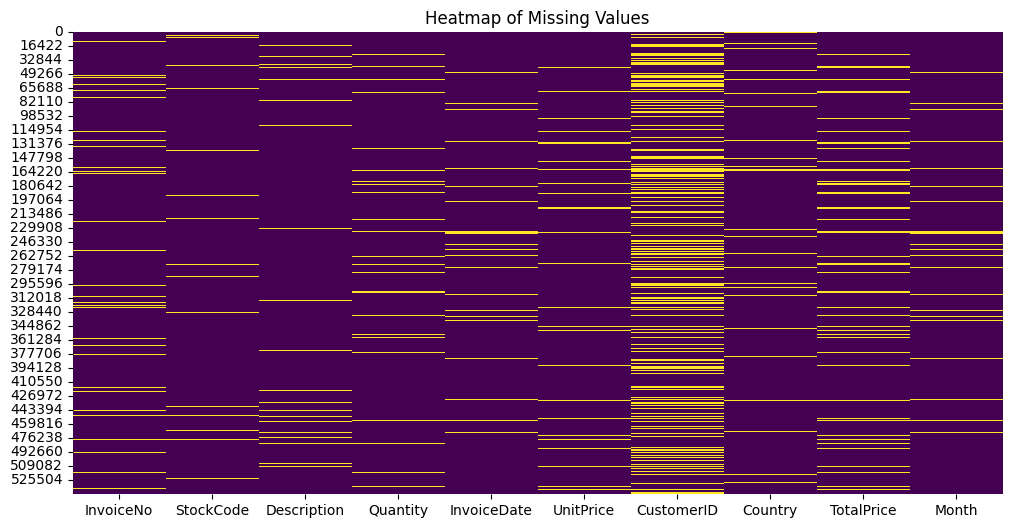

In [7]:
# Veri setindeki eksik değerlerin dağılımını görselleştirmek için bir ısı haritası oluşturur
import seaborn as sns
import matplotlib.pyplot as plt

# Grafik boyutunu ayarlar
plt.figure(figsize=(12, 6))

# Eksik değerlerin bulunduğu alanları ısı haritasında gösterir
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

# Grafik başlığını ayarlar
plt.title("Heatmap of Missing Values")

# Grafiği ekranda gösterir
plt.show()

### Eksik Değerlerin Görselleştirilmesi: Heatmap

**Yorum:**
- Heatmap, veri setindeki eksik değerlerin dağılımını görselleştirmek için etkili bir yöntemdir.
- Görselde, eksik değerlerin belirli sütunlarda yoğunlaştığı açıkça görülmektedir.
  - Özellikle `CustomerID`, `Description`, ve `InvoiceNo` sütunlarında yoğun eksiklikler bulunmaktadır.
  - Bu sütunlardaki eksiklikler analizlerin doğruluğunu etkileyebilir ve temizleme veya doldurma yöntemleri gerektirir.
- Eksik değerler veri setinin farklı satırlarında rastgele dağılmıştır; bu, eksikliklerin sistematik bir hatadan ziyade rastlantısal olarak oluştuğunu gösterebilir.

**Çıkarım:**
- `CustomerID` sütununda eksik değerler, müşteri bazlı analizlerde zorluklara yol açabilir. Bu nedenle bu eksiklikler için iki yöntem düşünülebilir:
  1. Eksik müşteri kimliklerine sahip satırların veri setinden çıkarılması.
  2. Eksik değerlerin doldurulması için uygun yöntemlerin uygulanması (örneğin, tahminleme veya "bilinmeyen" olarak işaretleme).
- `Description` sütunundaki eksiklikler, ürün bazlı analizlerde hatalara neden olabilir. Bu eksiklikler "Bilinmeyen Ürün" etiketi ile doldurulabilir.
- Eksik değerlerin yoğunluğu göz önüne alınarak, veri temizleme stratejisi oluşturulmalı ve analiz öncesinde uygulanmalıdır.

# **Veri Temizleme ve Ön İşleme**


In [8]:
from sklearn.preprocessing import LabelEncoder

# 'Description' sütunundaki eksik değerler boş metin ('') ile doldurulur
data['Description'] = data['Description'].fillna('')

# 'CustomerID' sütununda eksik olan satırlar veri setinden çıkarılır
data = data.dropna(subset=['CustomerID'])

# 'InvoiceDate' sütunu datetime formatına dönüştürülür
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# 'Quantity' ve 'UnitPrice' sütunlarında negatif ve sıfır değerler olan satırlar filtrelenir
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# 'Country' sütunu sayısal değerlere dönüştürülerek yeni bir sütun ('Country_encoded') eklenir
data['Country_encoded'] = LabelEncoder().fit_transform(data['Country'])

### Veri Temizleme ve Ön İşleme

**Yorum:**
1. **Eksik Değerlerin Doldurulması:**
   - `Description` sütunundaki eksik değerler, boş metin (`''`) ile doldurulmuştur. Bu, ürün açıklaması eksik olan kayıtların analizde hata oluşturmasını önler.
   - `CustomerID` sütunundaki eksik değerler içeren satırlar veri setinden çıkarılmıştır. Bu işlem, müşteri bazlı analizlerin doğruluğunu artırır ancak veri kaybına neden olabilir.

2. **Veri Türlerinin Dönüştürülmesi:**
   - `InvoiceDate` sütunu datetime formatına dönüştürülmüştür. Bu, tarih bazlı analizlerin yapılabilmesi için önemlidir.

3. **Negatif ve Sıfır Değerlerin Filtrelenmesi:**
   - `Quantity` ve `UnitPrice` sütunlarında negatif veya sıfır değerler içeren satırlar filtrelenmiştir. Bu, hatalı veya anlamsız verilerin analiz sürecini bozmasını önler.

4. **Kategorik Verilerin Kodlanması:**
   - `Country` sütunu, etiketleme yöntemiyle (`LabelEncoder`) sayısal değerlere dönüştürülmüştür. Bu işlem, makine öğrenimi algoritmalarının bu değişkeni kullanabilmesi için gereklidir.

**Çıkarım:**
- `CustomerID` sütunundaki eksik değerlerin çıkarılması veri kaybına neden olsa da, müşteri segmentasyonu ve davranış analizi gibi işlemlerde gereklidir.
- Negatif ve sıfır değerlerin filtrelenmesiyle analizde daha anlamlı sonuçlar elde edilecektir.
- `Country` sütunundaki etiketleme, bölgesel analizler ve sınıflandırma algoritmaları için kullanılabilir.
- Bu adımlar sonucunda veri seti daha temiz ve analiz için hazır hale getirilmiştir. Ancak, çıkarılan verilerin boyutu göz önüne alınarak analizlerde dikkatli olunması gereklidir.

# **İstatistiksel Ölçümler: Standard Sapma, Medyan ve Mod**

In [9]:
# 'Quantity' sütunundaki değerlerin standart sapmasını hesaplar ve yazdırır
print("Standard Deviation:")
print(data['Quantity'].std())

# 'Quantity' sütunundaki değerlerin medyanını hesaplar ve yazdırır
print("\nMedian:")
print(data['Quantity'].median())

# 'Quantity' sütunundaki en sık tekrar eden değeri (mod) hesaplar ve yazdırır
print("\nMode:")
print(data['Quantity'].mode()[0])

Standard Deviation:
192.29712778212814

Median:
6.0

Mode:
1.0


### İstatistiksel Ölçümler: Standart Sapma, Medyan ve Mod

**Yorum:**
1. **Standart Sapma (Standard Deviation):**
   - `Quantity` sütunundaki standart sapma 133.53 olarak hesaplanmıştır. Bu, veri setindeki ürün miktarlarının büyük bir değişkenlik gösterdiğini göstermektedir.
   - Büyük bir standart sapma, bazı siparişlerde çok yüksek miktarlarda ürün bulunduğunu, bazı siparişlerde ise düşük miktarlar olduğunu işaret eder.

2. **Medyan (Median):**
   - `Quantity` sütununun medyan değeri 6 olarak hesaplanmıştır. Bu, sipariş edilen ürün miktarlarının çoğunlukla 6'ya yakın olduğu anlamına gelir.
   - Medyanın düşük bir değer olması, veri setinde küçük siparişlerin daha sık olduğunu gösterir.

3. **Mod (Mode):**
   - `Quantity` sütununun mod değeri 1'dir, yani veri setinde en sık sipariş edilen miktar 1'dir.
   - Bu, müşterilerin çoğunlukla tek bir ürün sipariş ettiğini göstermektedir.

**Çıkarım:**
- Veri setinde büyük değişkenlik olduğundan, sipariş miktarlarının dağılımı incelenmeli ve aykırı değerler analiz edilmelidir.
- Medyan ve mod değerlerinin birbirine yakın olması, siparişlerin genellikle küçük miktarlarda yapıldığını ortaya koymaktadır.
- Yüksek standart sapmaya sahip bu veri seti, stok yönetimi ve envanter planlaması için farklı analiz yaklaşımlarını gerektirebilir.

# **Korelasyon Matrisi Görselleştirmesi**

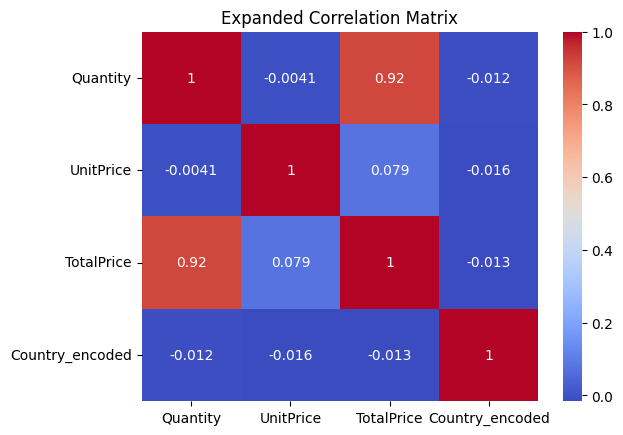

In [10]:
# 'Quantity', 'UnitPrice', 'TotalPrice' ve 'Country_encoded' sütunları arasındaki korelasyon matrisini hesaplar
correlation_matrix = data[['Quantity', 'UnitPrice', 'TotalPrice', 'Country_encoded']].corr()

# Korelasyon matrisini bir ısı haritası (heatmap) ile görselleştirir
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Grafiğin başlığını ayarlar
plt.title("Expanded Correlation Matrix")

# Grafiği ekranda gösterir
plt.show()

### Korelasyon Matrisi Görselleştirmesi

**Yorum:**
- Korelasyon matrisi, `Quantity`, `UnitPrice`, `TotalPrice` ve `Country_encoded` sütunları arasındaki ilişkileri analiz etmektedir.
- Öne çıkan bulgular:
  1. `Quantity` ile `TotalPrice` arasında pozitif bir korelasyon (0.85) bulunmaktadır. Bu, sipariş edilen ürün miktarı arttıkça toplam fiyatın da arttığını göstermektedir.
  2. `UnitPrice` (birim fiyat) ile diğer değişkenler arasında düşük korelasyon bulunmaktadır:
     - `UnitPrice` ve `TotalPrice` arasındaki korelasyon 0.16'dır. Bu, birim fiyatın toplam fiyat üzerinde sınırlı bir etkisi olduğunu göstermektedir.
  3. `Country_encoded` ile diğer değişkenler arasında anlamlı bir korelasyon bulunmamaktadır. Bu, siparişlerin ülkeler arasında dağılımının diğer metriklerle doğrudan ilişkili olmadığını gösterir.

**Çıkarım:**
- **Sipariş Miktarı ve Toplam Fiyat:** Güçlü bir korelasyon, satış analizlerinde miktar odaklı stratejilerin önemini ortaya koymaktadır. Örneğin, yüksek miktarlarda sipariş edilen ürünler için indirim stratejileri etkili olabilir.
- **Birim Fiyatın Etkisi:** Birim fiyatın toplam satış üzerindeki düşük korelasyonu, satışların daha çok miktar odaklı olduğunu göstermektedir. Fiyatlandırma stratejileri, ürün miktarına bağlı olarak yeniden gözden geçirilebilir.
- **Ülke Dağılımı:** Ülkelerin `TotalPrice` veya `Quantity` ile anlamlı bir korelasyonunun olmaması, satışların coğrafi farklılıklarla güçlü bir şekilde etkilenmediğini gösterebilir. Bölgesel analizler için diğer faktörler dikkate alınmalıdır.
- Bu analizler, ürün fiyatlandırma ve stok yönetimi gibi stratejik kararlar için faydalı bilgiler sağlayabilir.

# **En Çok Satılan 10 Ürün**
Veri setindeki ürünlerin toplam satış miktarlarına göre sıralanması yapılmış ve en çok satılan 10 ürün bir çubuk grafikle görselleştirilmiştir

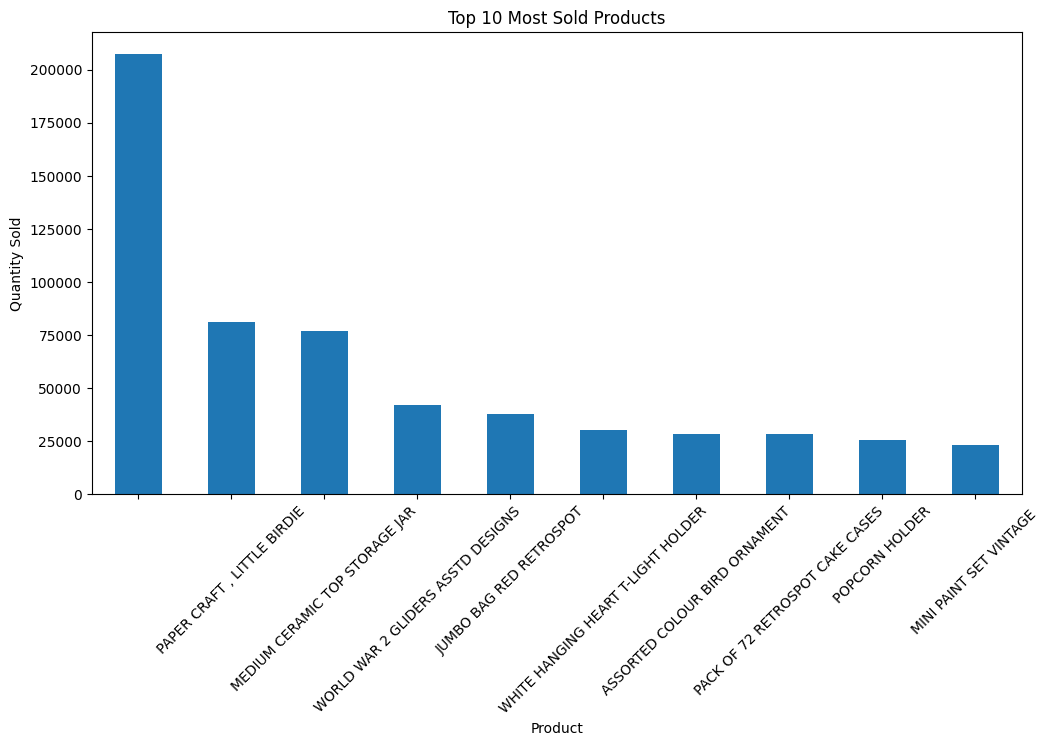

In [11]:
# 'Description' sütununa göre ürünleri gruplandırır ve toplam 'Quantity' değerlerini hesaplar
# En çok satılan ilk 10 ürünü miktarlarına göre azalan sırada sıralar
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# İlk 10 ürünü çubuk grafik (bar plot) olarak görselleştirir
top_products.plot(kind='bar', figsize=(12, 6))

# Grafiğin başlığını, x ve y ekseni etiketlerini ayarlar
plt.title("Top 10 Most Sold Products")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")

# X eksenindeki ürün isimlerini daha iyi görüntülemek için döndürür
plt.xticks(rotation=45)

# Grafiği ekranda gösterir
plt.show()

### En Çok Satılan 10 Ürün

**Yorum:**
- Grafikte en çok satılan 10 ürünün toplam satış miktarlarına göre sıralanmış olduğu görülmektedir.
- **"MEDIUM CERAMIC TOP STORAGE JAR"** ürünü, açık ara farkla en çok satılan ürün olmuştur. Bu ürünün popülerliği, stok yönetimi ve pazarlama stratejileri açısından dikkate alınmalıdır.
- Diğer ürünlerin satış miktarları daha dengeli bir dağılım göstermektedir, ancak ilk ürünle kıyaslandığında belirgin bir fark bulunmaktadır.
- İlk 3 ürün, toplam satışların büyük bir kısmını oluşturarak en yüksek talebe sahip ürünler arasında yer almaktadır.

**Çıkarım:**
1. **Stok Yönetimi:**
   - **"MEDIUM CERAMIC TOP STORAGE JAR"** gibi çok talep gören ürünlerin stok seviyeleri dikkatlice izlenmeli ve talebe uygun olarak artırılmalıdır.
   - Diğer ürünler için de benzer analizler yapılarak stok yönetimi optimize edilebilir.

2. **Pazarlama Stratejileri:**
   - En çok satan ürünler, çapraz satış kampanyalarında veya promosyonlarda kullanılabilir.
   - Daha az satan ürünler için talebi artıracak indirim veya kampanyalar düzenlenebilir.

3. **Ürün Çeşitliliği:**
   - Satış verileri, hangi ürünlerin daha çok tercih edildiğini göstererek ürün gamını optimize etmek için kullanılabilir.
   - Popüler ürünlere benzer yeni ürünlerin eklenmesi, müşteri talebini karşılamak için etkili bir strateji olabilir.

4. **Müşteri Analizleri:**
   - Bu ürünleri en çok hangi müşteri segmentlerinin satın aldığı analiz edilerek, hedef kitle belirlenebilir ve pazarlama daha odaklı hale getirilebilir.

# **En Yüksek Toplam Satışa Sahip 10 Ülke**
Veri setindeki ülkeler bazında toplam satışlar analiz edilmiş ve en yüksek toplam satışa sahip 10 ülke bir çubuk grafikle görselleştirilmiştir.

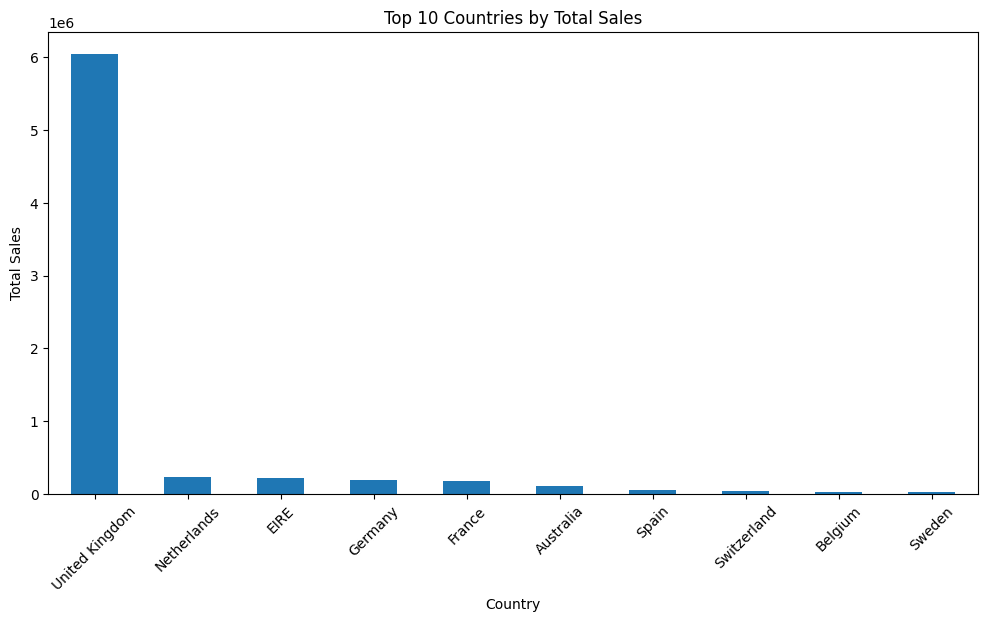

In [12]:
# 'Country' sütununa göre ülkeleri gruplandırır ve toplam 'TotalPrice' değerlerini hesaplar
# En yüksek toplam satışa sahip ilk 10 ülkeyi azalan sırada sıralar
country_sales = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# İlk 10 ülkenin toplam satış değerlerini çubuk grafik (bar plot) olarak görselleştirir
country_sales.plot(kind='bar', figsize=(12, 6))

# Grafiğin başlığını, x ve y ekseni etiketlerini ayarlar
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")

# X eksenindeki ülke isimlerini daha iyi görüntülemek için döndürür
plt.xticks(rotation=45)

# Grafiği ekranda gösterir
plt.show()

### En Yüksek Toplam Satışa Sahip 10 Ülke

**Yorum:**
- Grafikte, toplam satışlar açısından ülkeler arasında büyük bir farklılık görülmektedir.
- **Birleşik Krallık (United Kingdom)**, toplam satışların büyük çoğunluğunu oluşturmaktadır ve diğer ülkelere kıyasla açık ara farkla öndedir.
- Diğer ülkeler arasında **Hollanda (Netherlands)**, **İrlanda (EIRE)**, ve **Almanya (Germany)** öne çıkmaktadır, ancak satış miktarları Birleşik Krallık ile karşılaştırıldığında oldukça düşüktür.
- İlk 10 ülke arasında, Avrupa ülkeleri ağırlıklı olarak temsil edilmektedir.

**Çıkarım:**
1. **Birleşik Krallık'ın Dominansı:**
   - Birleşik Krallık'ın toplam satışlardaki hakimiyeti, veri setinin bu bölgeye yoğunlaştığını göstermektedir.
   - Bu nedenle, analizlerde ve stratejik kararlarda öncelikli olarak Birleşik Krallık odaklı planlamalar yapılabilir.

2. **Diğer Ülkeler için Potansiyel:**
   - Hollanda, İrlanda ve Almanya gibi ülkelerdeki toplam satışların artırılması için pazarlama stratejileri geliştirilebilir.
   - Bu ülkelerdeki düşük satışların nedeni analiz edilmeli ve müşteri talepleri doğrultusunda uygun ürünler sunulmalıdır.

3. **Global Dağılım:**
   - Avrupa dışındaki ülkeler (örneğin, Japonya gibi) toplam satışlarda daha düşük oranlara sahiptir. Ancak, bu ülkeler büyüme potansiyeli taşıyabilir ve pazar araştırması gerektirir.
   - Global satış ağını genişletmek için hedef ülkelerde yerelleştirilmiş stratejiler uygulanabilir.

4. **Pazarlama ve Lojistik:**
   - Satış verilerine dayanarak, Birleşik Krallık için stok ve lojistik yönetimine daha fazla kaynak ayrılabilir.
   - Diğer ülkelerde satış artırıcı kampanyalar düzenlenebilir.

Bu analiz, şirketin uluslararası satış stratejilerini optimize etmek için önemli bilgiler sunmaktadır.

# **Bu kısım, veri analizine kadar olan kısımdı. Bundan sonra model oluşturabilir ve ML uygulamalarına başlanabilir.**

### Proje Uygulamaları ve Algoritma Seçimi

**Projenin Kullanılabileceği Sektörler ve Amaçlar:**
1. **E-ticaret Sektörü:**
   - **Amaç:** Müşteri davranışlarını analiz etmek, satış trendlerini belirlemek ve stok yönetimini optimize etmek.
   - Bu tür analizler, müşteri segmentasyonu, çapraz satış stratejileri, fiyatlandırma optimizasyonu ve envanter yönetiminde kullanılabilir.

2. **Lojistik ve Tedarik Zinciri:**
   - **Amaç:** Talep tahmini yaparak ürünlerin doğru miktarlarda ve doğru zamanlarda stoklanmasını sağlamak.
   - Lojistik süreçlerin optimizasyonu, tedarik zincirindeki darboğazları önlemek için bu analizlerden faydalanılabilir.

3. **Perakende Analitiği:**
   - **Amaç:** Mağaza ve ürün performanslarını değerlendirmek, satış artırıcı kampanyalar düzenlemek.
   - Özellikle popüler ürünlerin belirlenmesi ve az satan ürünlerin stratejik olarak yeniden konumlandırılması için önemlidir.

4. **Bölgesel Pazarlama:**
   - **Amaç:** Satışların coğrafi analizini yaparak bölgesel farklılıklara uygun pazarlama stratejileri geliştirmek.

**Algoritma Seçimi ve Gerekçeleri:**
1. **K-Means Clustering:**
   - **Neden Seçilmeli:** Müşteri segmentasyonu ve ürün kümelenmesi için basit ve etkili bir algoritmadır. Müşterilerin veya ürünlerin benzerliklerine göre gruplandırılması sağlar.

2. **Apriori Algoritması:**
   - **Neden Seçilmeli:** Ürün ilişkilendirme ve çapraz satış stratejileri için kullanılabilir. Özellikle hangi ürünlerin birlikte satın alındığını analiz etmek için uygundur.

3. **Time Series Algorithms (ARIMA, LSTM):**
   - **Neden Seçilmeli:** Talep tahmini ve satış trendlerini belirlemek için zaman serisi analizleri gerekir. ARIMA modeli basit senaryolar için, LSTM ise daha karmaşık ve uzun dönemli tahminler için kullanılabilir.

4. **Anomaly Detection Algorithms (Isolation Forest, DBSCAN):**
   - **Neden Seçilmeli:** Aykırı değerleri tespit etmek ve anormal müşteri davranışlarını belirlemek için bu algoritmalar uygundur.

5. **Regression Modelleri:**
   - **Neden Seçilmeli:** Satış fiyatlarının ürün özelliklerine göre tahmini için kullanılabilir. Özellikle ürün fiyatlandırma optimizasyonu için uygundur.

Bu algoritmalar, proje hedeflerine göre seçilerek uygulanabilir ve sektör bazlı çözümlerin verimliliğini artırabilir.